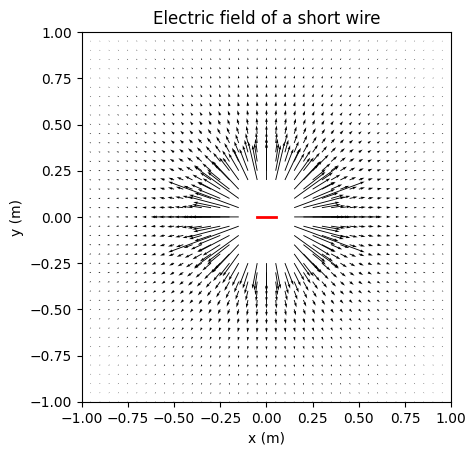

In [1]:
import numpy
import matplotlib.pyplot as plt
import math

#define a function to calculate the area of each slice using trapezoidal rule
def area(f1,f2,dx):
    a=0.5*(f1+f2)*dx
    return a

#define constants
density = 1e-6#C/m
L = 0.1#m
epsilon0=8.85e-12#C^2/(Nm^2)
k = 1./(4*math.pi*epsilon0)

#define our functions to be integrated
def dEx(x,y,xprime):
    return k*density*(x-xprime)/((x-xprime)**2 + y**2)**(3/2)
def dEy(x,y,xprime):
    return k*density*y/((x-xprime)**2 + y**2)**(3/2)

#define our integral bounds
a=-L/2
b=L/2
#define our slices
n = 100
dx=(b-a)/n
xprimevals=numpy.arange(a,b,dx)

#define grid of x and y values for which we want to calculate field
x=numpy.linspace(-1,1,41)
y=numpy.linspace(-1,1,41)

# need some arrays to store values to plot
xforplot=[]
yforplot=[]
Exforplot=[]
Eyforplot=[]
for xv in x:# for each x value in grid
    for yv in y:# for each y value in grid
        if abs(yv)<0.2:#can't calculate field at location of wire, which is y=0
            if abs(xv)<L*1.25:#can't calculate field at location of wire which is -L/2 to L/2 in x
                continue #skip these points
        Ex=0.#initialize to zero
        Ey=0.
        for val in xprimevals:
            f1=dEx(xv,yv,val)
            f2=dEx(xv,yv,val+dx)
            a=area(f1,f2,dx)#area of slice
            Ex+=a#add to total
            f1=dEy(xv,yv,val)
            f2=dEy(xv,yv,val+dx)
            a=area(f1,f2,dx)#area of slice
            Ey+=a#add to total
        #add these values to array for plotting
        xforplot.append(xv)
        yforplot.append(yv)
        Exforplot.append(Ex)
        Eyforplot.append(Ey)

#create vector field plot
plt.quiver(xforplot,yforplot,Exforplot,Eyforplot)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Electric field of a short wire")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')# so plot is square instead of rectangular
#create line to represent wire
x1=[-L/2,L/2]
y1=[0,0]
plt.plot(x1,y1,"-",lw=2,color="red")
plt.show()

